# Долгосрочные задания #1-2 по курсу математической статистики

Сааков А.С. СКБ182  
Версия от 06.10.2020

## 1. Домашнее задание. Вероятностные распределения

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell
import scipy.stats as sts
from scipy.stats import geom
from random import random
from collections import Counter
import copy
import math
from math import *
from random import *

## 1.1. Геометрическое распределение

### 1.1.1. Описание основных характеристик распределения

Функция вероятности дискретного распределения: $P_\xi(x) = pq^x, x \in \{0,1,2,...\}$  
Математическое ожидание:  
$$M\xi=\sum_{k=1}^{\infty}kpq^{k-1}=p\sum_{k=1}^{\infty}kq^{k-1}=p\sum_{k=1}^{\infty}\frac{dq^k}{dq}=p\frac{d}{dq}(\sum_{k=1}^{\infty}q^k)=p\frac{d}{dq}(\frac{q}{1-q})=p\frac{1}{(1-q)^2}=\frac{1}{p}$$
Дисперсия:  
$$D\xi=M(\xi-M\xi)^2=M\xi^2-(M\xi)^2=M(\xi(\xi-1)+\xi)-M\xi^2=M(\xi(\xi-1))+M\xi-(M\xi)^2=M(\xi(\xi-1))+M\xi(1-\xi)$$
$$M(\xi(\xi-1))=p\sum_{k=1}^{\infty}k^2q^{k-1}=pq\sum_{k=0}^{\infty}\frac{d^2q^k}{dq^2}=pq\frac{d^2}{dq^2}(\sum_{k=0}^{\infty}q^k)=pq\frac{d^2}{dq^2}(\frac{1}{1-q})=pq\frac{2}{(1-q)^3}=\frac{2q}{p^2}$$
$$D\xi = M\xi^2+M\xi-(M\xi)^2=\frac{2q}{p^2}+\frac{1}{p}-\frac{1}{p^2}=\frac{2q-1}{p^2}+\frac{1}{p}=\frac{2q-1+p}{p^2}=\frac{2q-1+1-q}{p^2}=\frac{q}{p^2}$$

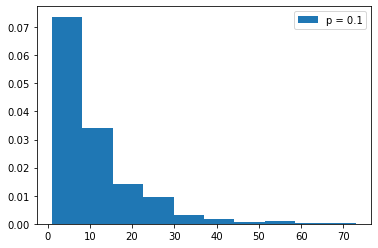

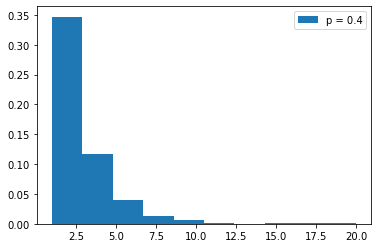

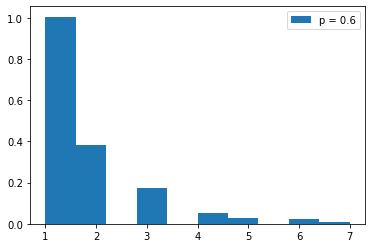

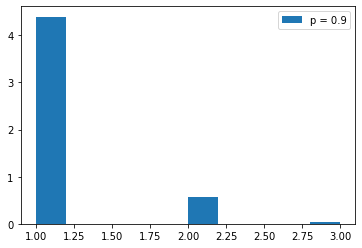

Рис. 1: 1.1.1, Гистограмма вероятностей дискретного распределения


In [2]:
for p in [0.1, 0.4, 0.6, 0.9]:
    geom_rv = sts.geom(p)
    sample = geom_rv.rvs(1000)
    plt.hist(sample, density = True, label='p = {}'.format(p))
    plt.legend()
    plt.show()
print('Рис. 1: 1.1.1, Гистограмма вероятностей дискретного распределения')

Мода $M_0$ - значение во множестве наблюдений, которое встречается наиболее часто, для дискретной случайной величины определяется с помощью гистограммы вероятностей.  
Из гистограмм видно, что $M_0 = 1$

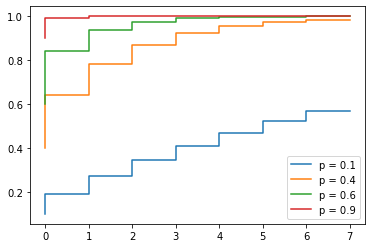

Рис. 1: 1.1.1, Гистограмма вероятностей дискретного распределения


In [17]:
for p in [0.1, 0.4, 0.6, 0.9]:
    n = np.arange(0, 8, 1)
    plt.step(n, 1-(1-p)**(n+1), label='p = {}'.format(p))
    plt.legend()
plt.show()
print('Рис. 1: 1.1.1, Гистограмма вероятностей дискретного распределения')

Медиана Ме находится из уравнения $P_\xi(x)=0.5$  
$\begin{cases}
    p+qp+q^2p+...+q^{Me-1}p \geq \frac{1}{2}\\
    q^{Me-1}p+q^{Me}p+q^{Me+1}p+... \geq \frac{1}{2}
  \end{cases}$  
$\begin{cases}
    p \frac{1-q^{Me}}{1-q} \geq \frac{1}{2}\\
    q^{Me-1}p\frac{1}{1-q} \geq \frac{1}{2}
  \end{cases}$  
$\begin{cases}
    1-q^{Me} \geq 2^{-1}\\
    q^{Me-1} \geq 2^{-1}
  \end{cases}$  
$\begin{cases}
    q^{Me} \leq 2^{-1}\\
    q^{Me-1} \geq 2^{-1}
  \end{cases}$  
$\begin{cases}
    Me \cdot log_2q \leq -1\\
    (Me-1)log_2q \geq -1
  \end{cases}$   
Отсюда $-\frac{1}{log_2q} \leq Me \leq 1-\frac{1}{log_2q}$

### Примеры событий, которые могут быть описаны выбранными случайными величинами

Типичные интерпретации геометрического распределения: описывает количество испытаний n до первого успеха при вероятности наступления успеха в каждом испытании p. Если n подразумевается номер испытания, в котором наступил успех, то геометрическое распределение будет описываться следующей формулой:
$$Geom_p(n)=q^{n-1}p$$
Геометрическое распределение считается дискретной версией экспоненциального распределения.  
Предположим, что эксперименты Бернулли проводятся через равные промежутки времени. Тогда геометрическая случайная величина Х - это время, измеренное в дискретных единицах, которое проходит до того, как мы добьемся первого успеха. . Но если мы хотим смоделироватьвремя, прошедшее до того, как данное событие произойдет в непрерывном времени, то подходящим распределением для использования будетэкспоненциальное распределение. С математической точки зрения геометрическое распределение обладает тем же свойством без памяти,которым обладает экспоненциальное распределение: в экспоненциальном случае вероятность того, что событие произойдет в течениезаданного временного интервала, не зависит от того, сколько времени уже прошло, а событие не произошло; в геометрическом случаевероятность того, что событие произойдет в данный момент (дискретное) времени, не зависит от того, что произошло раньше, потому чтоэксперимент Бернулли, проведенный в каждый момент времени, не зависит от предыдущих испытаний.Геометрическое распределение полезно для определения вероятности успеха при ограниченном количестве испытаний, что очень применимо креальному миру, в котором неограниченные испытания редки. Поэтому неудивительно, что различные сценарии хорошо моделируютсягеометрическими распределениями:
 - В спорте, особенно в бейсболе, геометрическое распределение полезно для анализа вероятности того, что отбивающий получит удар,прежде чем он получит три удара; здесь цель - добиться успеха за 3 испытания.
 - При анализе затрат и выгод, например, когда компания решает, финансировать ли исследовательские испытания, которые в случае успехапринесут компании некоторую предполагаемую прибыль, цель состоит в том, чтобы достичь успеха до того, как затраты превысятпотенциальную выгоду.
 - В тайм-менеджменте цель состоит в том, чтобы выполнить задачу за установленный промежуток времени.Другие приложения, подобные вышеупомянутым, также легко создаются. Фактически, геометрическое распределение применяется наинтуитивном уровне в повседневной жизни на регулярной основе. 

### 1.1.3  Описание способа моделирования выбранных случайных величин

Существует такой способ реализации метода обратных функций, при котором трудоемкость по крайней мере формально не зависит от p. Действительно, накопленная вероятность $s_{n+1} = p_0+ ... +p_n$ для геометрического распределения имеет вид  
$$s_{n+1} = \sum_{i = 0}^{n} p(1-p)^i = 1 - (1-p)^{n+1}$$
Поэтому событие $\{\xi = n\}$ приобретает вид  
$$\{\xi = n\} = \{s_n < \alpha \leq s_{n+1}\} = \{1 - (1-p)^n < \alpha \leq 1 - (1-p)^{n+1}\} = \{(1-p)^{n+1} \leq 1 - \alpha < (1 - p)^n\} = \{(n+1)ln(1-p) \leq ln(1-\alpha) < n \cdot ln(1-p)\} = \{n < \frac{ln(1-\alpha)}{ln(1-p)} \leq n+1\},$$  
и тем самым 
$$\xi = [\frac{ln(1-\alpha)}{ln(1-p)}]$$
Эту же формулу можно получить по-другому. Пусть $\nu$ - случайная величина, имеющая показательное распределение с параметром $\lambda$ и $\xi = [n]$. Тогда при $n \geq 0$
$$P(\xi = n) = P(n \leq \nu < n+1) = e^{-n\lambda} - e^{-(n+1)\lambda} = (1-e^{-\lambda})e^{-n\lambda}.$$
Поскольку случайная величина $\frac{-ln(1-\alpha)}{\lambda}$ имеет показательное распределение с параметров $\lambda$, то взяв $\lambda = -ln(1-p)$, приходим к формуле $\xi = [\frac{ln(1-\alpha}{ln(1-p)}]$

[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 5.0, 1.0, 1.0, 1.0, 0.0, 2.0, 0.0, 2.0, 5.0, 0.0, 0.0, 3.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 1.0, 2.0, 1.0, 0.0, 1.0, 3.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 3.0, 3.0, 1.0, 2.0, 0.0, 7.0, 1.0, 0.0, 1.0, 4.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 3.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 3.0, 1.0, 5.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, 6.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0, 6.0, 0.0, 0.0, 1.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 3.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 3.0, 0.0, 1.0, 0.0, 1.0, 0.0, 5.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 6.0, 0.0, 0.0, 3.0, 1.0, 3.0, 1.0, 0.0, 3.0, 3.0, 3.0, 3.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

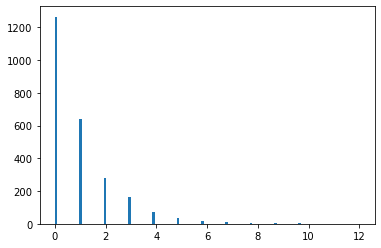

In [8]:
def sample_(N=2500, scale = 0.5):
    for x in range(N):
        je = np.log(random())//np.log(1-scale)#Генерирование случайных чисел по формуле из справочника
    return je
def Geom(n, p=0.5):
    x=[sample_(scale=p) for x in range(n)]
    print(x)
    return x
plt.hist(Geom(2500,0.5),25, width = 0.1)
plt.show()

## 1.2. Распределение Максвелла

### 1.2.1. Описание основных характеристик распределения

Математическое ожидание:
$$M\xi = \int_0^{\infty}x\sqrt{\frac{2}{\pi}}\frac{x^2}{\lambda^3}e^{-\frac{x^2}{2\lambda^2}}dx=\sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3}\int_0^{\infty}x^3e^{\frac{-x^2}{2\lambda^2}}dx=2\lambda^4\cdot \sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3}=2\lambda \sqrt{\frac{2}{\pi}}$$
Дисперсия:
$$D\xi = M(\xi-M\xi)^2=M\xi^2-(M\xi)^2=M(\xi(\xi-1)+\xi)-(M\xi)^2=M(\xi(\xi-1))+M\xi-(M\xi)^2=M(\xi(\xi-1))+M\xi(1-(M\xi))$$
$$M(\xi(\xi-1))=\int_0^{\infty} x^2f(x)dx = \int_0^{\infty} x^2 \sqrt{\frac{2}{\pi}}\frac{x^2}{\lambda^3}e^{-\frac{x^2}{2\lambda^2}}=\sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3}\int_0^{\infty} x^4 e^{-\frac{x^2}{2\lambda^2}} = \sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3} \cdot 3\lambda^4 \sqrt{\frac{\lambda^2\pi}{2}}=3\lambda^2$$
$$D\xi=M\xi^2-(M\xi)^2=3\lambda^2-4\lambda^2\cdot \frac{2}{\pi}=\frac{3\pi-8}{\pi}\lambda^2$$
Все вычисленные интегралы можно найти в таблице интегралов, взятой из курса физики и представленной ниже.

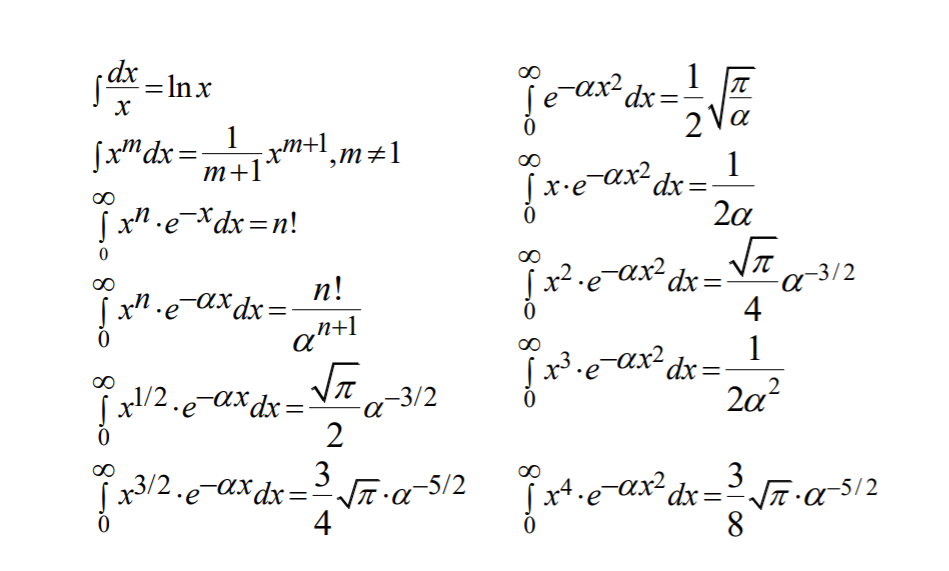

Рис.4: График функции распределения


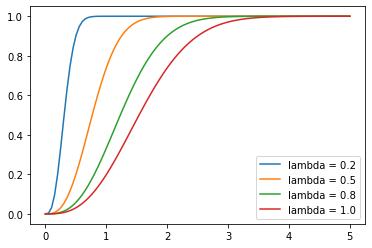

In [10]:
for lambd in [0.2,0.5,0.8,1.0]:
    maxwell_rv = sts.maxwell(scale = lambd)
    x = np.linspace(0,5,100)
    cdf = maxwell_rv.cdf(x)
    plt.plot(x, cdf, label = 'lambda = {}'.format(lambd))
    plt.legend()
print('Рис.4: График функции распределения')

Значение моды по У: 2.9061680461442085
Значение моды по У: 1.1741012992781867
Значение моды по У: 0.7333399979540686
Значение моды по У: 0.5870506496390934


Рис.5: График плотности вероятности распределения


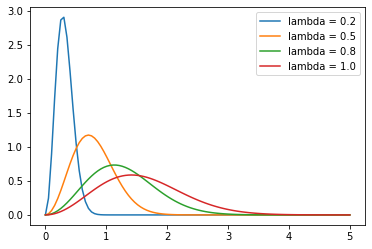

In [12]:
for lambd in [0.2,0.5,0.8,1.0]:
    maxwell_rv = sts.maxwell(scale = lambd)
    x = np.linspace(0,5,100)
    pdf = maxwell_rv.pdf(x)
    k = max(pdf)
    print('Значение моды по У:', k)
    plt.plot(x, pdf, label ='lambda = {}'.format(lambd))
    plt.legend()
print('\n')
print('Рис.5: График плотности вероятности распределения')

Исходя из графика видно, что 
$M_0= \lambda \sqrt{2}$ - максимум функции плотности вероятности распределения

Медиана  
$\int_0^{Me}\sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3}x^2 e^{-\frac{-x^2}{2\lambda^2}}dx = \frac{1}{2}$  
$\int_0^{Me}x^2 e^{-\frac{-x^2}{2\lambda^2}}dx = \frac{\lambda^3}{2}\sqrt{\frac{\pi}{2}}$  
$(-\lambda^2e^{-\frac{x^2}{2\lambda^2}}x+\lambda^3\sqrt{\frac{\pi}{2}})|_0^{Me} = \frac{\lambda^3}{2}\sqrt{\frac{\pi}{2}}$  
$-Me\lambda^2e^{\frac{-Me^2}{2\lambda^2}}=- \frac{\lambda^3}{2}\sqrt{\frac{\pi}{2}}$  
$Me \cdot e^{\frac{-Me^2}{2\lambda^2}} = \frac{\lambda^2}{2}\sqrt{\frac{\pi}{2}}$  
$Me \approx 1,5383\lambda$

### 1.2.2. Примеры событий, которые могут быть описаны выбранными случайными величинами

Впервые распределение было определено и использовалось для описания скоростей частиц в идеализированных газах, где частицы свободноперемещаются внутри стационарного контейнера, не взаимодействуя друг с другом, за исключением очень коротких столкновений, в которыхони обмениваются энергией и импульсом друг с другом или со своим тепловым окружением. Термин «частица» в этом контексте относитсятолько к газообразным частицам (атомам или молекулам), и предполагается, что система частиц достигла термодинамического равновесия.Энергии таких частиц следуют так называемой статистике Максвелла – Больцмана, а статистическое распределение скоростей выводитсяпутем приравнивания энергии частиц к кинетической энергии.Распределение Максвелла – Больцмана в основном применяется к скоростям частиц в трех измерениях, но оказывается, что оно зависит толькоот скорости (величины скорости) частиц. Распределение вероятности скорости частицы указывает, какие скорости более вероятны: частицабудет иметь скорость, выбранную случайным образом из распределения, и с большей вероятностью будет находиться в одном диапазонескоростей, чем в другом.  
При тепловом равновесии (T=const) $u_{кв}$ молекул газа остается постоянной и равной $u=\sqrt{\frac{3kT}{m}}$  
Это объясняется тем, что в газе устанавливается стационарное статическое распределение молекул по значениям скоростей, называемое распределением Максвелла:  
$f(u)=\frac{dN(u)}{Ndu}=4\pi(\frac{m}{2\pi kT})^{\frac{3}{2}}\cdot u^2 \cdot e^{-\frac{mu^2}{2kT}}$  
В теории вероятностей рассматривается распределения Максвелла, в котором $x=u$ и $\frac{1}{\lambda^2}=\frac{m}{kT}$

### 1.2.3. Описание способа моделирования выбранных случайных величин

Центральная предельная теорема - довольно неожиданный результат, связывающий выборочное среднее n независимых и одинаково распределенных (независимых и одинаково распределенных) случайных величин и нормального распределения. Точнее сказать  
Пусть $X_1, X_2,…, X_n - n$ независимых и одинаково распределенных случайных величин с $M(X_i) = \mu$ и $D(X_i) = \sigma^2$, и пусть $S_n = \frac{X_1 + X_2 + ... + X_n}{n}$ - среднее по выборке. Тогда $S_n$ аппроксимирует нормальное распределение со средним значением $\mu$ и дисперсией $\frac{\sigma^2}{n}$ для больших n (т.е. $S_n \approx N (\mu,\frac{\sigma^2}{n}))$  
Удивительный результат состоит в том, что $X_n$ может быть любым распределением. Это не ограничивается только нормальными распределениями. Мы также можем определить стандартное нормальное распределение в терминах $S_n$, сдвигая и масштабируя его:
$$N(0,1) \approx \frac{S_n - \mu}{\frac{\sigma}{\sqrt{n}}} = \frac{\sqrt{n}(S_n - \mu)}{\sigma} \ \ (1)$$

Попробуем использовать центральную предельную теорему для выборки из N (0,1). Сначала давайте определим нашу независимую и одинаково распределенную переменную $X_n$ так, чтобы она имела распределение Бернулли с p = 0,5, которое мы можем интуитивно представить как подбрасывание несмещенной монеты:
\begin{equation*}
P(X_n = k) = 
 \begin{cases}
   p = 0.5 &\text{если k = 1}\\
   1 - p =0.5 &\text{если k = 0}
 \end{cases}
\end{equation*}  
Напомним, распределение Бернулли тесно связано с биномиальным распределением, обозначенным через B(n, p) как Bernoulli(p) = B(n = 1, p). Биномиальное распределение можно интуитивно представить как подсчет количества орлов в n бросках монеты (т.е. в испытаниях Бернулли). Если n = 1, это сводится к распределению Бернулли (или единственному подбрасыванию монеты).  
Давайте теперь определим нашу выборку среднего для n бросков нашей несмещенной монеты:
$$S_n = \frac{X_1+X_2+...+X_n}{n} = \frac{B(n, p = 0.5)}{n}$$
Мы знаем, что распределение Бернулли имеет μ = 12 (мы ожидаем, что половина наших бросков будет орлом), и $\sigma^2 = p(1-p) = 0.25$  
Сдвигая и масштабируя это, чтобы получить наше стандартное нормальное распределение с использованием уравнения (1), мы получаем:  
$$N(0,1) \approx \frac{\sqrt{n}(S_n - \mu)}{\sigma} = \frac{\sqrt{n}(\frac{X_1+X_2+...+X_n}{n} - 0.5)}{\sqrt{0.25}} = 2\sqrt{n}(\frac{X_1+X_2+...+X_n}{n} - 0.5) \ \ \ \ (2)$$  
Теоретически это должно дать нам уравнение для грубой имитации стандартного нормального распределения.

[10.22415440676313, -7.668115805072333, 5.112077203381535, 2.7386127875258333, -1.6431676725155, -0.5477225575051666, 1.8257418583505352, -3.286335345031, -6.207522318391868, -1.8257418583505656, -0.18257418583506568, -3.4689095308660653, 0.0, -19.900586256021032, 8.763560920082666, -5.2946513892166, 8.763560920082666, 5.112077203381535, 2.9211869733608684, 0.912870929175298, 1.8257418583505352, -0.7302967433402323, -2.5560386016907675, -4.0166320883712325, 3.8340579025361663, 0.5477225575051666, -3.4689095308660653, 3.468909530866035, 7.485541619237297, -5.659799760886732, -3.103761159195934, -0.9128709291752676, 0.5477225575051666, 0.7302967433402019, -7.485541619237267, -5.112077203381565, 0.912870929175298, 2.0083160441856314, -1.6431676725155, 2.7386127875258333, 13.145341380124, 11.86732207927857, 3.1037611591959644, 2.556038601690798, 1.2780193008453686, -3.651483716701101, 4.199206274206298, -7.120393247567166, -2.1908902300206665, 2.7386127875258333, 2.556038601690798, -0.9128

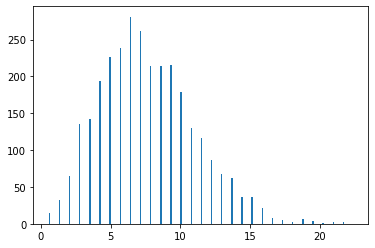

In [14]:
def Maxwell(n,lambd = 1):
    x = [sample_(scale = lambd) for x in range(n)]
    y=[sample_(scale = lambd) for x in range(n)]
    z=[sample_(scale = lambd) for x in range(n)]
    l = []
    print(x)
    for i in range(n):
        l.append(np.sqrt(x[i]**2+y[i]**2+z[i]**2))
    return l
# Our sample function of N(0,1) using Equation (2)
def sample_(N = 3000,scale = 1):
    return scale*2.0*np.sqrt(N)*(sum(randint(0,1)for x in range(N))/N-0.5)
plt.hist(Maxwell(3000,5),30, width = 0.1)
plt.show()

# 2 Домашнее задание. Основные понятия математической статистики

## 2.1 Геометрическое распределение

### 2.1.1 Моделирование выбранных случайных величин

In [19]:
# Создание случайной величины с геометрическим распределением, зависящим
# от параметра p
p = 0.5
geom_rv = sts.geom(p)

In [20]:
#Генерация выборки объема n = 5 с выводом
for n in [5]:
    means_5 = []
    for i in range(5):
        sample = geom_rv.rvs(n)
        means_5.append(sample)
        print(sample)

[1 1 5 4 2]
[2 1 5 1 1]
[1 6 3 3 4]
[2 2 1 1 3]
[4 2 3 1 5]


In [21]:
#Генерация выборки объема n = 10 с выводом
for n in [10]:
    means_10 = []
    for i in range(5):
        sample = geom_rv.rvs(n)
        means_10.append(sample)
        print(sample)

[2 3 1 1 1 1 3 1 1 1]
[5 4 1 1 1 2 1 3 2 1]
[1 5 2 1 1 2 2 2 1 1]
[3 3 5 1 2 4 3 1 2 1]
[2 1 1 2 1 3 3 1 1 1]


In [22]:
#Генерация выборки объема n = 100 ,без вывода
for n in [100]:
    means_100 = []
    for i in range(5):
        sample = geom_rv.rvs(n)
        means_100.append(sample)

In [23]:
#Генерация выборки объема n = 1000 ,без вывода
for n in [1000]:
    means_1000 = []
    for i in range(5):
        sample = geom_rv.rvs(n)
        means_1000.append(sample)

In [24]:
#Генерация выборки объема n = 100000 ,без вывода
for n in [100000]:
    means_100000 = []
    for i in range(5):
        sample = geom_rv.rvs(n)
        means_100000.append(sample)

### 2.1.2 Построение эмпирической функции распределения

In [25]:
#n=5
for a in range(5):
    b=means_5[a]
    b=sorted(b)
    print('Empirical distribution function F5(x) for sample',a+1,':')
    for i in range(4):
        if(i==0):
            n=0.
            g=1
            print(n,', x <=',b[i])
        if(b[i+1]==b[i]):
            g+=1
        else:
            n=round(n+0.2*g,1)
            g=1
            print(n,',',b[i],'< x <=',b[i+1])
        if(i==3):
            n=1.
            print(n,', x >',b[i+1])

Empirical distribution function F5(x) for sample 1 :
0.0 , x <= 1
0.4 , 1 < x <= 2
0.6 , 2 < x <= 4
0.8 , 4 < x <= 5
1.0 , x > 5
Empirical distribution function F5(x) for sample 2 :
0.0 , x <= 1
0.6 , 1 < x <= 2
0.8 , 2 < x <= 5
1.0 , x > 5
Empirical distribution function F5(x) for sample 3 :
0.0 , x <= 1
0.2 , 1 < x <= 3
0.6 , 3 < x <= 4
0.8 , 4 < x <= 6
1.0 , x > 6
Empirical distribution function F5(x) for sample 4 :
0.0 , x <= 1
0.4 , 1 < x <= 2
0.8 , 2 < x <= 3
1.0 , x > 3
Empirical distribution function F5(x) for sample 5 :
0.0 , x <= 1
0.2 , 1 < x <= 2
0.4 , 2 < x <= 3
0.6 , 3 < x <= 4
0.8 , 4 < x <= 5
1.0 , x > 5


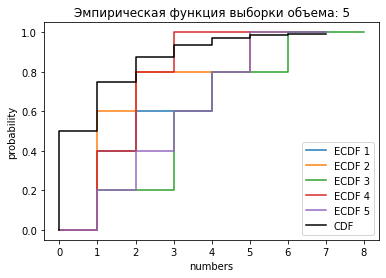

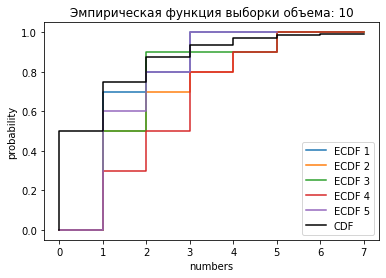

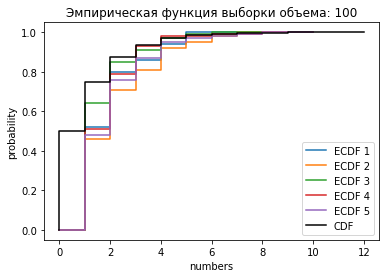

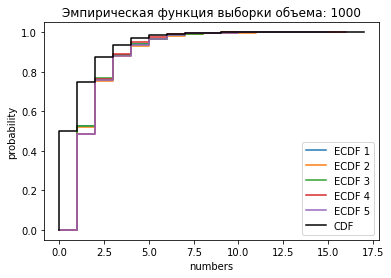

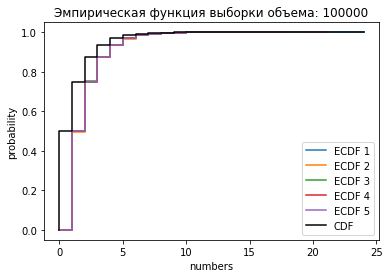

In [29]:
#n=5
for a in range(5):
    b=means_5[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range(b[v-1]):
        N.append(b.count(i))
        x1=[]
        y1=[]
        t=0
    for i in range(b[v-1]):
        t+=N[i]
        x1.append(i)
        y1.append(t/v)
        x1.append(i+1)
        y1.append(t/v)
    x1.append(b[v-1])
    y1.append(1)
    x1.append(b[v-1]+2)
    y1.append(1)
    plt.plot(x1,y1,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
n=np.arange(0,8,1)#Построение
plt.step(n,1-(1-p)**(n),'k-', label='CDF')#теоретическойфункции
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")
#n=10
for a in range(5):
    b=means_10[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range(b[v-1]):
        N.append(b.count(i))
        x2=[]
        y2=[]
        t=0
    for i in range(b[v-1]):
        t+=N[i]
        x2.append(i)
        y2.append(t/v)
        x2.append(i+1)
        y2.append(t/v)
    x2.append(b[v-1])
    y2.append(1)
    x2.append(b[v-1]+2)
    y2.append(1)
    plt.plot(x2,y2,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
n=np.arange(0,8,1)#Построение
plt.step(n,1-(1-p)**(n),'k-', label='CDF')#теоретическойфункции
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")
#n=100
for a in range(5):
    b=means_100[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range(b[v-1]):
        N.append(b.count(i))
        x3=[]
        y3=[]
        t=0
    for i in range(b[v-1]):
        t+=N[i]
        x3.append(i)
        y3.append(t/v)
        x3.append(i+1)
        y3.append(t/v)
    x3.append(b[v-1])
    y3.append(1)
    x3.append(b[v-1]+2)
    y3.append(1)
    plt.plot(x3,y3,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
n=np.arange(0,13,1)#Построение
plt.step(n,1-(1-p)**(n),'k-', label='CDF')#теоретическойфункции
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")
#n=1000
for a in range(5):
    b=means_1000[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range(b[v-1]):
        N.append(b.count(i))
        x4=[]
        y4=[]
        t=0
    for i in range(b[v-1]):
        t+=N[i]
        x4.append(i)
        y4.append(t/v)
        x4.append(i+1)
        y4.append(t/v)
    x4.append(b[v-1])
    y4.append(1)
    x4.append(b[v-1]+2)
    y4.append(1)
    plt.plot(x4,y4,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
n=np.arange(0,18,1)#Построение
plt.step(n,1-(1-p)**(n), 'k-', label='CDF')#теоретическойфункции
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")
#n=100000
for a in range(5):
    b=means_100000[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range(b[v-1]):
        N.append(b.count(i))
        x5=[]
        y5=[]
        t=0
    for i in range(b[v-1]):
        t+=N[i]
        x5.append(i)
        y5.append(t/v)
        x5.append(i+1)
        y5.append(t/v)
    x5.append(b[v-1])
    y5.append(1)
    x5.append(b[v-1]+2)
    y5.append(1)
    plt.plot(x5,y5,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
n=np.arange(0,25,1)#Построение
plt.step(n,1-(1-p)**(n), 'k-', label='CDF')#теоретическойфункции
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")

Пусть $X = (X_1,...,X_n)$- выборка из дискретного распределения $\sigma(\xi)$ Величина скачка в точке j есть
$$\Delta \dot F_n(j)= \dot F_n(j) - \dot F_n(j-0)=\frac{\nu}{n},$$
$j=1,...,N$  
Здесь $P\{\Delta \dot F_n(j)=0\}=P(\nu_j=0)=(1-p_j)^n$ что мало при больших n, т.е. в большой выборке скачок в точке j наверняка будет иметь место. Более того, так как
$P\{\cup_{j=1}^{N} \{\Delta \dot F_n(j)=0\}\} \leq \sum_{j=1}^{N} (1-p_j)^n \rightarrow 0,$
при $n \rightarrow \infty$ , то в больших выборках с вероятностью, близкой к 1, скачки э.ф.р. $F_n(x)$ будут иметь место во всех точках 1,2,...,N, а случайными будут лишь величины этих скачков.  
Если же теоретическая функция распределения $F_\xi = F(x)$ непрерывна, то с вероятностью 1 все элементы выборки $X = (X_1, ..., X_n)$ будут различны, и случайными теперь будут точки скачков, величины же скачков неслучайны и равны $\frac{1}{n}$  
Таким образом, для выборок из дискретных и непрерывных распределений характер соответствующих эмпирических функций распределениябудет различным, что можно заметить на получившихся графиков для дискретного и непрерывного распределения. Тем не менее в любомслучае э.ф.р. $\dot F_n(x)$ с увеличением объема выборки n сближается в каждой точке х с теоретической функцией распределения F(x).  
Максимальная точная верхняя граница разности пары эмпирических функций распределения - наибольшая разность между значениямивероятности двух функций в одной точке.  
Неудачная попытка рассчитать верхнюю границу разности э.ф.р. выборок размера n = 5, так как у меня получилось 0, что неверно.

Верхняя граница разности э.ф.р. выборок размера n = 5 : 0


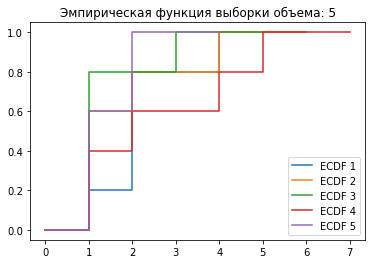

In [31]:
s=0
for a in range(5):
    b=means_5[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range(b[v-1]):
        N.append(b.count(i))
        x1=[]
        y1=[]
        t=0
        x_=[]
        y_=[]
    for i in range(b[v-1]):
        t+=N[i]
        x1.append(i)
        y1.append(t/v)
        x1.append(i+1)
        y1.append(t/v)
        if(t!=0):
            sch=0
            if(len(y1)>len(y_)):
                for j in y_:
                    if(math.fabs(y1[sch]-y_[sch])>s):
                        s=math.fabs(y1[sch]-y_[sch])
                    sch+=1
            else:
                for j in y1:
                    if(math.fabs(y1[sch]-y_[sch]>s)):
                        s=math.fabs(y1[sch]-y_[sch])
                    sch+=1
        y_=copy.copy(y1)
    x1.append(b[v-1])
    y1.append(1)
    x1.append(b[v-1]+2)
    y1.append(1)
    #x_ = copy.copy(x1)
    #y_ = copy.copy(y1)
    plt.plot(x1,y1,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
print("Верхняя граница разности э.ф.р. выборок размера n = 5 :",s)

Верхняя граница разности э.ф.р. выборок размера n = 5 : 0.600  
Верхняя граница разности э.ф.р. выборок размера n = 10 : 0.400  
С увеличением объема выборки верхняя граница разности уменьшается, что очевидно.

### 2.1.3 Построение вариационного ряда выборки

Определение:  
Пусть  $X = (X_1,...,X_n)$- выборка из некоторого распределения $\sigma(\xi)$  
Произвольной реализации $x = (x_1, ..., x_n)$ этой выборки можно поставить в соответствие упорядоченную последовательность  
$$x_{(1)} \leq x_{(2)} \leq ... \leq x_{(n)}$$
располагая $x_1, ..., x_n$ в порядке их возрастания, так что $x_{(1)} = min \{x_1, ..., x_n\}, x_{(2)}$ - второе по величине значение, $x_{(n)} = max\{x_1,...,x_n \}$  
Обозначим через $X_{(k)}$ случайную величину, которая для каждой реализации выборки Х принимает значение $x_{(k)}, k = 1,...,n$. Так по выборке Х определяют новую последовательность случайных величин $X_{(1)},..., X_{(n)}$, называемых $\textit{порядковыми статистиками}$ выборки. Из определения порядковых статистик следует, что они упорядочены по возрастанию их значений, т.е. они образуют возрастающую последовательность  
$$X_{(1)} \leq X_{(2)} \leq ... \leq X_{(n)},$$
которая называется $\textit{вариационным рядом}$ выборки Х.

In [32]:
#Вариационный ряд для выборки объема n=5 с выводом
for a in range(5):
    b=means_5[a]
    b=sorted(b)
    print(b)

[1, 2, 2, 2, 4]
[1, 1, 1, 2, 4]
[1, 1, 1, 1, 3]
[1, 1, 2, 4, 5]
[1, 1, 1, 2, 2]


In [33]:
#Вариационный ряд для выборки объема n=10 с выводом
for a in range(5):
    b=means_10[a]
    b=sorted(b)
    print(b)

[1, 1, 2, 2, 2, 2, 2, 2, 3, 4]
[1, 1, 1, 1, 2, 2, 2, 2, 3, 4]
[1, 1, 1, 1, 2, 2, 2, 3, 4, 4]
[1, 1, 1, 1, 1, 2, 3, 3, 4, 6]
[1, 1, 1, 1, 1, 1, 2, 3, 3, 6]


In [34]:
#Вариационный ряд для выборки объема n=100 без вывода
for a in range(5):
    b=means_100[a]
    b=sorted(b)

In [35]:
#Вариационный ряд для выборки объема n=1000 без вывода
for a in range(5):
    b=means_1000[a]
    b=sorted(b)

In [36]:
#Вариационный ряд для выборки объема n=100000 без вывода
for a in range(5):
    b=means_100000[a]
    b=sorted(b)

Определение:   
$\alpha$- квантиль случайной величины $\xi$ с функцией распределения $F(x) = P\{\xi < x\}$ — это любое число $x_\alpha$, удовлетворяющее двум условиям:  
$1) F(x_\alpha) \leq \alpha$ $2)F(x_\alpha+0) \geq \alpha.$  
Исходя из того, что при больших выборках э.ф.р. стремится к теоритической функции распределения, эмпирические квантили так же стремятся к теоритическим по определению.
Пусть F(x) - функция распределения. Тогда квантильная функция:  
$F^{-1}(r) = min\{x \in N_+ : F(x) \geq r\} for r \in (0;1)$  
$F^{-1}(r) = [\frac{ln(1-r)}{ln(1-p}]$

In [37]:
k = 1
for b in [means_5[a], means_10[a],means_100[a],means_1000[a],means_100000[a]]:
    if(k==1):
        print('n = 5')
    if(k==2):
        print('n = 10')
    if(k==3):
        print('n = 100')
    if(k==4):
        print('n = 1000')
    if(k==5):
        print('n = 100000')
    print(np.quantile(b, 0.1))
    k += 1

n = 5
1.0
n = 10
1.0
n = 100
1.0
n = 1000
1.0
n = 100000
1.0


In [38]:
#Сравнение
np.log(1-0.1)//np.log(1-p)

0.0

In [39]:
k = 1
for b in [means_5[a], means_10[a],means_100[a],means_1000[a],means_100000[a]]:
    if(k==1):
        print('n = 5')
    if(k==2):
        print('n = 10')
    if(k==3):
        print('n = 100')
    if(k==4):
        print('n = 1000')
    if(k==5):
        print('n = 100000')
    print(np.quantile(b, 0.5))
    k += 1

n = 5
1.0
n = 10
1.0
n = 100
2.0
n = 1000
1.0
n = 100000
1.0


In [42]:
#Сравнение
geom.median(p)

1.0

In [43]:
#Сравнение
np.log(1-0.5)//np.log(1-p)

1.0

In [40]:
k = 1
for b in [means_5[a], means_10[a],means_100[a],means_1000[a],means_100000[a]]:
    if(k==1):
        print('n = 5')
    if(k==2):
        print('n = 10')
    if(k==3):
        print('n = 100')
    if(k==4):
        print('n = 1000')
    if(k==5):
        print('n = 100000')
    print(np.quantile(b, 0.7))
    k += 1

n = 5
1.7999999999999998
n = 10
2.3
n = 100
2.299999999999997
n = 1000
2.0
n = 100000
2.0


In [44]:
#Сравнение
np.log(1-0.7)//np.log(1-p)

1.0

### 2.1.4 Построение гистограммы и полигона частот

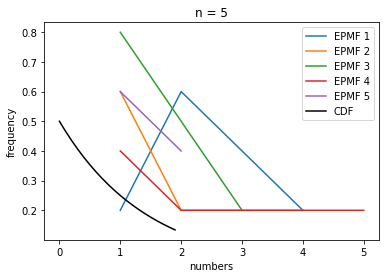

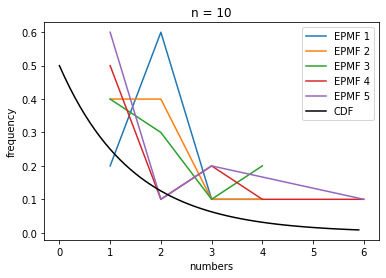

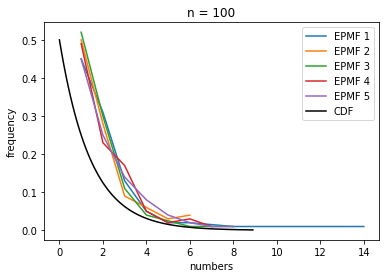

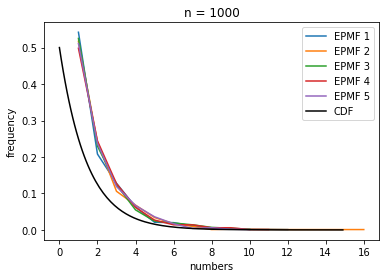

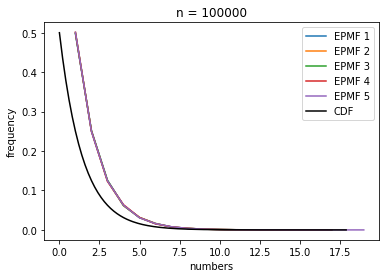

In [48]:
#n=5
for a in range(5):
    b=means_5[a]
    b=sorted(b)
    x=[]
    y=[]
    c=Counter(b)
    for i in c:
        x.append(i)
        y.append(b.count(i)/5.0)
    plt.plot(x,y,label="EPMF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("n = 5")
n=np.arange(0,2,0.1)#Построение
plt.plot(n,p*(1-p)**(n),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=10
for a in range(5):
    b=means_10[a]
    b=sorted(b)
    x=[]
    y=[]
    c=Counter(b)
    for i in c:
        x.append(i)
        y.append(b.count(i)/10.0)
    plt.plot(x,y,label="EPMF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("n = 10")
n=np.arange(0,6,0.1)#Построение
plt.plot(n,p*(1-p)**(n),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=100
for a in range(5):
    b=means_100[a]
    b=sorted(b)
    x=[]
    y=[]
    c=Counter(b)
    for i in c:
        x.append(i)
        y.append(b.count(i)/100.0)
    plt.plot(x,y,label="EPMF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("n = 100")
n=np.arange(0,9,0.1)#Построение
plt.plot(n,p*(1-p)**(n),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=1000
for a in range(5):
    b=means_1000[a]
    b=sorted(b)
    x=[]
    y=[]
    c=Counter(b)
    for i in c:
        x.append(i)
        y.append(b.count(i)/1000.0)
    plt.plot(x,y,label="EPMF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("n = 1000")
n=np.arange(0,15,0.1)#Построение
plt.plot(n,p*(1-p)**(n),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=100000
for a in range(5):
    b=means_100000[a]
    b=sorted(b)
    x=[]
    y=[]
    c=Counter(b)
    for i in c:
        x.append(i)
        y.append(b.count(i)/100000.0)
    plt.plot(x,y,label="EPMF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("n = 100000")
n=np.arange(0,18,0.1)#Построение
plt.plot(n,p*(1-p)**(n),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()

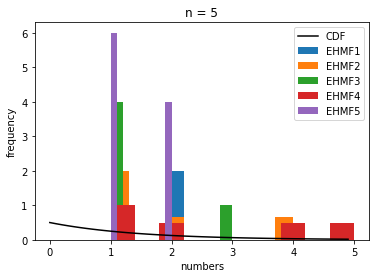

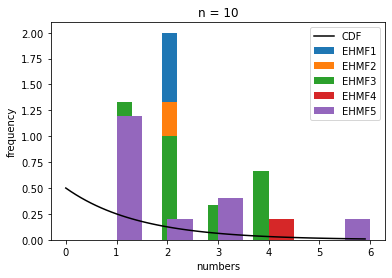

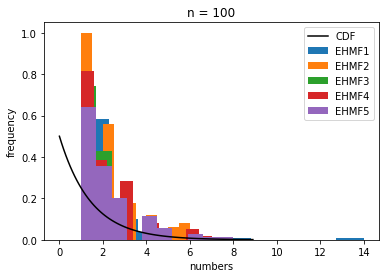

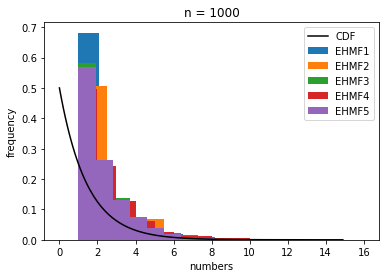

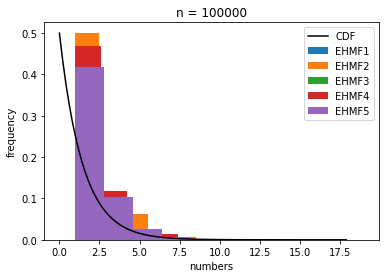

In [51]:
#n=5
for a in range(5):
    plt.hist(means_5[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
n=np.arange(0,5,0.1)#Построение
plt.plot(n,p*(1-p)**(n),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.title("n = 5")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=10
for a in range(5):
    plt.hist(means_10[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
n=np.arange(0,6,0.1)#Построение
plt.plot(n,p*(1-p)**(n),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.title("n = 10")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=100
for a in range(5):
    plt.hist(means_100[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
n=np.arange(0,9,0.1)#Построение
plt.plot(n,p*(1-p)**(n),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.title("n = 100")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=1000
for a in range(5):
    plt.hist(means_1000[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
n=np.arange(0,15,0.1)#Построение
plt.plot(n,p*(1-p)**(n),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.title("n = 1000")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=100000
for a in range(5):
    plt.hist(means_100000[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
n=np.arange(0,18,0.1)#Построение
plt.plot(n,p*(1-p)**(n),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.title("n = 100000")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()

Если наблюдаемая в эксперименте случайная величина $\xi$ дискретна и принимает значения $a_1,a_2,..$, то более наглядное представление о ее законе распределения дадут относительные частоты $\nu_r^* = \frac{\nu_r}{n}$, где $\nu_r$ - число элементов выборки $X = (X_1,...,X_n)$, принявших значение $a_r: \nu_r = \sum_{j=1}^{n}I(X_j = a_r), r = 1,2,..$, т.е. $\nu_r^*$ сближается с ростом n с теоретической вероятностью $P\{\xi = a_r\}$, и потому, по крайней мере для больших выборок, относительные частоты $\nu_r^*$ можно рассматривать в качестве приближенных значений (оценок) для неизвестных вероятностей $P\{\xi = a_r\}$.  
Наглядным представлением данных является полигон частот, который представляет собой ломаную с вершинами в точках $(a_r;\nu_r), r = 1,2,...$  
Можно рассматривать также статистический ряд {{($a_r; \nu_r$)}}.  
На графиках выше наглядно подтверждаются наши теоретические знания.

## 2.2 Распределение Максвелла

### 2.2.1 Моделирование выбранных случайных величин

In [52]:
# Создание случайной величины с распределением Максвелла, зависящим
# от параметра lambda
lambd=1.0
maxwell_rv=sts.maxwell(scale=lambd)

In [53]:
#Генерация выборки объема n = 5 с выводом
for n in[5]:
    means__5=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__5.append(sample)
        print(sample)

[2.01315043 1.03538073 2.1263068  1.54676417 1.42736479]
[1.25362818 2.368997   1.38723854 2.49562556 1.51767316]
[1.61646547 1.72451407 1.81389764 0.41708715 1.14891726]
[0.73981261 3.36302057 1.46148055 1.16814669 1.2022256 ]
[1.18588454 1.6322514  1.70800855 0.82739072 1.30351584]


In [65]:
#Генерация выборки объема n = 10 с выводом
for n in[10]:
    means__10=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__10.append(sample)
        print(sample)

[2.96043105 0.96631129 0.61917124 0.4855692  0.36750809 2.10569525
 2.36780995 2.95675005 2.98074824 1.5276111 ]
[2.91846654 2.35279186 2.22133726 2.18776768 1.48319187 0.80412329
 1.67289162 2.96075601 1.58072634 2.31153333]
[0.74953611 1.33670637 1.06999359 2.47051128 0.71383474 1.57028832
 1.18810993 3.10842423 3.50592687 0.26475154]
[1.23311074 1.24998054 1.48042107 1.44058528 1.71523514 0.65180408
 2.07998603 1.05029503 1.77562815 2.57841015]
[2.31034835 1.32862186 1.46650149 1.40060844 2.49293345 1.66601805
 0.96181644 2.55464786 1.2945863  1.04567938]


In [66]:
#Генерация выборки объема n = 100 без вывода
for n in[100]:
    means__100=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__100.append(sample)

In [67]:
#Генерация выборки объема n = 1000 без вывода
for n in[1000]:
    means__1000=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__1000.append(sample)

In [68]:
#Генерация выборки объема n = 100000 без вывода
for n in[100000]:
    means__100000=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__100000.append(sample)

In [58]:
#Вернёмся к медиане и убедимся, что в пункте 1.2.1 она была найдена верно
maxwell.median()

1.5381722544550522

### 2.2.2 Построение эмпирической функции распределения

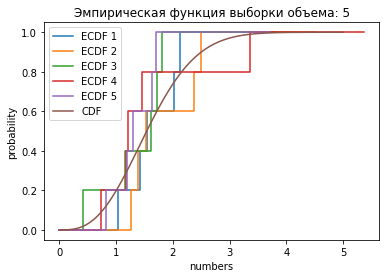

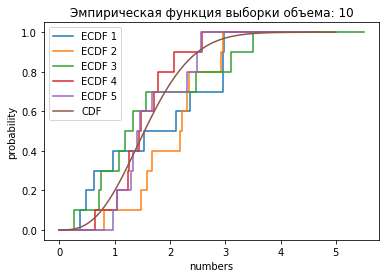

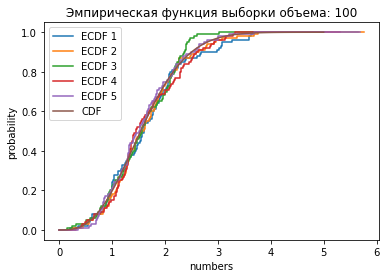

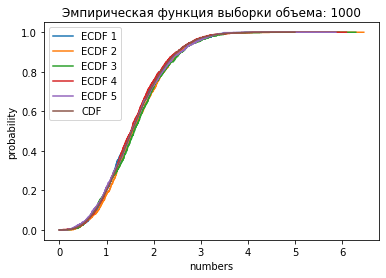

In [71]:
#n=5
for a in range(5):
    b=means__5[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range((v-1)):
        N.append(b.count(b[i]))
        x=[]
        y=[]
        t=0
        x.append(0.0)
        y.append(0.0)
        x.append(b[0])
        y.append(0.0)
    for i in range((v-1)):
        t+=N[i]
        x.append(b[i])
        y.append(float(t/v))
        x.append(b[i+1])
        y.append(float(t/v))
    x.append(b[v-1])
    y.append(1)
    x.append(b[v-1]+2)
    y.append(1)
    plt.plot(x,y,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
x=np.linspace(0,5,100)#Построение
cdf=maxwell_rv.cdf(x)#теоретической функции
plt.plot(x,cdf,label='CDF')#распределения
plt.legend()
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")
#n=10
for a in range(5):
    b = means__10[a]
    b = sorted(b)
    v = len(b)
    N = []
    for i in range((v-1)):
        N.append(b.count(b[i]))
        x=[]
        y=[]
        t=0
        x.append(0.0)
        y.append(0.0)
        x.append(b[0])
        y.append(0.0)
    for i in range((v-1)):
        t+=N[i]
        x.append(b[i])
        y.append(float(t/v))
        x.append(b[i+1])
        y.append(float(t/v))
    x.append(b[v-1])
    y.append(1)
    x.append(b[v-1]+2)
    y.append(1)
    plt.plot(x,y,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
x=np.linspace(0,5,100)#Построение
cdf=maxwell_rv.cdf(x)#теоретической функции
plt.plot(x,cdf,label='CDF')#распределения
plt.legend()
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")
#n=100
for a in range(5):
    b=means__100[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range((v-1)):
        N.append(b.count(b[i]))
        x=[]
        y=[]
        t=0
        x.append(0.0)
        y.append(0.0)
        x.append(b[0])
        y.append(0.0)
    for i in range((v-1)):
        t+=N[i]
        x.append(b[i])
        y.append(float(t/v))
        x.append(b[i+1])
        y.append(float(t/v))
    x.append(b[v-1])
    y.append(1)
    x.append(b[v-1]+2)
    y.append(1)
    plt.plot(x,y,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
x=np.linspace(0,5,100)#Построение
cdf=maxwell_rv.cdf(x)#теоретической функции
plt.plot(x,cdf,label='CDF')#распределения
plt.legend()
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")
#n=1000
for a in range(5):
    b=means__1000[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range((v-1)):
        N.append(b.count(b[i]))
        x=[]
        y=[]
        t=0
        x.append(0.0)
        y.append(0.0)
        x.append(b[0])
        y.append(0.0)
    for i in range((v-1)):
        t+=N[i]
        x.append(b[i])
        y.append(float(t/v))
        x.append(b[i+1])
        y.append(float(t/v))
    x.append(b[v-1])
    y.append(1)
    x.append(b[v-1]+2)
    y.append(1)
    plt.plot(x,y,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
x=np.linspace(0,5,100)#Построение
cdf=maxwell_rv.cdf(x)#теоритической функции
plt.plot(x,cdf,label='CDF')#распределения
plt.legend()
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")

### 2.2.3 Построение вариационного ряда выборки

In [72]:
#Вариационный ряд для выборки объема n=5 с выводом
for a in range(5):
    b=means__5[a]
    b=sorted(b)
    print(b)

[1.0353807270442847, 1.4273647855567988, 1.5467641667316663, 2.013150431223069, 2.126306802075634]
[1.2536281800906348, 1.3872385392313227, 1.5176731575053712, 2.3689969958425254, 2.495625563406912]
[0.4170871540028409, 1.148917256675329, 1.6164654688627638, 1.7245140739394667, 1.8138976363141606]
[0.7398126058412591, 1.1681466885354352, 1.2022256018951225, 1.4614805531692072, 3.363020566094099]
[0.827390717694074, 1.1858845418089676, 1.3035158415896428, 1.63225139963341, 1.7080085516644874]


In [73]:
#Вариационный ряд для выборки объема n=10 с выводом
for a in range(5):
    b=means__10[a]
    b=sorted(b)
    print(b)

[0.3675080894415532, 0.4855691995946941, 0.6191712384937998, 0.9663112882835846, 1.5276111007603443, 2.1056952549272494, 2.367809951174858, 2.956750049625363, 2.960431045963957, 2.9807482375595176]
[0.804123292403792, 1.4831918742356893, 1.580726337850995, 1.6728916177951485, 2.187767678386214, 2.2213372637852986, 2.3115333279541233, 2.352791858668548, 2.9184665384774124, 2.960756006216524]
[0.264751543737762, 0.7138347428421055, 0.7495361067198436, 1.0699935882412537, 1.1881099254472476, 1.3367063695949235, 1.570288318538132, 2.4705112817126706, 3.108424226014807, 3.505926867698561]
[0.6518040819325244, 1.0502950299752738, 1.233110741002212, 1.2499805360270257, 1.44058528168434, 1.4804210717674742, 1.7152351378600486, 1.7756281499976743, 2.0799860339038765, 2.5784101468826695]
[0.9618164405913195, 1.04567938162586, 1.294586298805596, 1.3286218569972446, 1.400608439512499, 1.4665014880969611, 1.6660180488949459, 2.3103483532948976, 2.4929334459857286, 2.5546478629444174]


In [74]:
#Вариационный ряд для выборки объема n=100 без вывода
for a in range(5):
    b=means__100[a]
    b=sorted(b)

In [75]:
#Вариационный ряд для выборки объема n=1000 без вывода
for a in range(5):
    b=means__1000[a]
    b=sorted(b)

In [76]:
#Вариационный ряд для выборки объема n=100000 без вывода
for a in range(5):
    b=means__100000[a]
    b=sorted(b)

Возникли сложности при вычислении теоретических значений квантилей, однако был найден справочник:"Справочник по вероятностным распределениям" Р.Н.Вадзинский. В нём была найдена таблица для приближенного решения уравнения $x_\alpha = \lambda m_\alpha$, где $x_\alpha = \lambda m_\alpha$ - квантиль порядка $\alpha$ распределения Максвелла

In [77]:
k=1
for b in [means__5[a],means__10[a],means__100[a],means__1000[a],means__100000[a]]:
    if(k==1):
        print('n = 5')
    if(k==2):
        print('n = 10')
    if(k==3):
        print('n = 100')
    if(k==4):
        print('n = 1000')
    if(k==5):
        print('n = 100000')
    print(np.quantile(b,0.1))
    k+=1

n = 5
0.9707882473400314
n = 10
1.037293087522406
n = 100
0.8097629699290513
n = 1000
0.722017056138982
n = 100000
0.7666584525091078


Сравнение со значением (с теоретическим) из таблицы:  
$\alpha \approx 0.76$

In [78]:
k=1
for b in [means__5[a],means__10[a],means__100[a],means__1000[a],means__100000[a]]:
    if(k==1):
        print('n = 5')
    if(k==2):
        print('n = 10')
    if(k==3):
        print('n = 100')
    if(k==4):
        print('n = 1000')
    if(k==5):
        print('n = 100000')
    print(np.quantile(b,0.5))
    k+=1

n = 5
1.3035158415896428
n = 10
1.43355496380473
n = 100
1.5149721618424095
n = 1000
1.5322418233804824
n = 100000
1.5350847848634879


In [80]:
#Сравнение
maxwell.median()

1.5381722544550522

In [79]:
k=1
for b in [means__5[a],means__10[a],means__100[a],means__1000[a],means__100000[a]]:
    if(k==1):
        print('n = 5')
    if(k==2):
        print('n = 10')
    if(k==3):
        print('n = 100')
    if(k==4):
        print('n = 1000')
    if(k==5):
        print('n = 100000')
    print(np.quantile(b,0.7))
    k+=1

n = 5
1.5665042880246565
n = 10
1.8593171402149313
n = 100
1.848526562280813
n = 1000
1.9249551150812045
n = 100000
1.9118778807493522


Сравнение со значением (с теоретическим) из таблицы:  
$\alpha \approx 1.92$

С увеличением объема выборки э.ф.р. стремится к теоритической функции распределения, следовательно, эмпирические квантили так жестремятся к теоритическим по определению. Что и видно выше.

### 2.2.4 Построение гистограммы и полигона частот

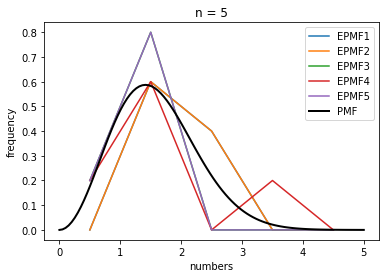

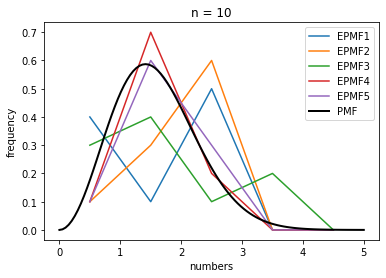

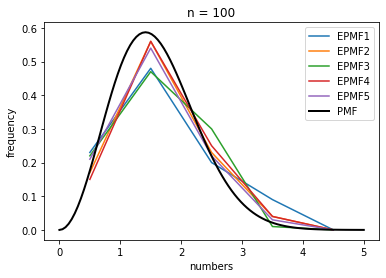

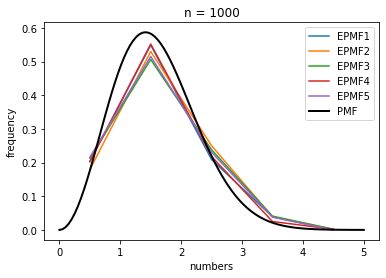

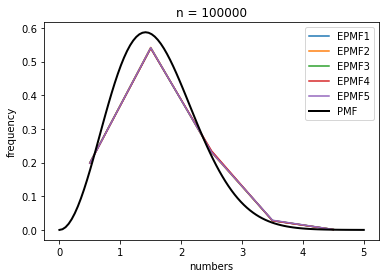

In [84]:
#n=5
for a in range(5):
    b=means__5[a]
    mas=list(range(1,6))
    p=[0,0,0,0,0]
    for i in range(5):
        mas[i]=b[i]
        if mas[i]>0 and mas[i]<1:
            p[0]=p[0]+1
        if mas[i]>1 and mas[i]<2:
            p[1]=p[1]+1
        if mas[i]>2 and mas[i]<3:
            p[2]=p[2]+1
        if mas[i]>3 and mas[i]<4:
            p[3]=p[3]+1 
        if mas[i]>4 and mas[i]<5:
            p[4]=p[4]+1
    print()
    dob=[]
    bod=[]
    keks=0.5
    for i in range(5):
        dob.append(keks)
        bod.append(p[i]/5.0)
        keks+=1
    plt.plot(dob,bod,label='EPMF'+str(a+1))
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 5")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=10
for a in range(5):
    b=means__10[a]
    mas=list(range(1,11))
    p=[0,0,0,0,0]
    for i in range(10):
        mas[i]=b[i]
        if mas[i]>0 and mas[i]<1:
            p[0]=p[0]+1
        if mas[i]>1 and mas[i]<2:
            p[1]=p[1]+1
        if mas[i]>2 and mas[i]<3:
            p[2]=p[2]+1
        if mas[i]>3 and mas[i]<4:
            p[3]=p[3]+1 
        if mas[i]>4 and mas[i]<5:
            p[4]=p[4]+1
    print()
    dob=[]
    bod=[]
    keks=0.5
    for i in range(5):
        dob.append(keks)
        bod.append(p[i]/10.0)
        keks+=1
    plt.plot(dob,bod,label='EPMF'+str(a+1))
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 10")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=100
for a in range(5):
    b=means__100[a]
    mas=list(range(1,101))
    p=[0,0,0,0,0]
    for i in range(100):
        mas[i]=b[i]
        if mas[i]>0 and mas[i]<1:
            p[0]=p[0]+1
        if mas[i]>1 and mas[i]<2:
            p[1]=p[1]+1
        if mas[i]>2 and mas[i]<3:
            p[2]=p[2]+1
        if mas[i]>3 and mas[i]<4:
            p[3]=p[3]+1 
        if mas[i]>4 and mas[i]<5:
            p[4]=p[4]+1
    print()
    dob=[]
    bod=[]
    keks=0.5
    for i in range(5):
        dob.append(keks)
        bod.append(p[i]/100.0)
        keks+=1
    plt.plot(dob,bod,label='EPMF'+str(a+1))
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 100")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=1000
for a in range(5):
    b=means__1000[a]
    mas=list(range(1,1001))
    p=[0,0,0,0,0]
    for i in range(1000):
        mas[i]=b[i]
        if mas[i]>0 and mas[i]<1:
            p[0]=p[0]+1
        if mas[i]>1 and mas[i]<2:
            p[1]=p[1]+1
        if mas[i]>2 and mas[i]<3:
            p[2]=p[2]+1
        if mas[i]>3 and mas[i]<4:
            p[3]=p[3]+1 
        if mas[i]>4 and mas[i]<5:
            p[4]=p[4]+1
    print()
    dob=[]
    bod=[]
    keks=0.5
    for i in range(5):
        dob.append(keks)
        bod.append(p[i]/1000.0)
        keks+=1
    plt.plot(dob,bod,label='EPMF'+str(a+1))
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 1000")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=100000
for a in range(5):
    b=means__100000[a]
    mas=list(range(1,100001))
    p=[0,0,0,0,0]
    for i in range(100000):
        mas[i]=b[i]
        if mas[i]>0 and mas[i]<1:
            p[0]=p[0]+1
        if mas[i]>1 and mas[i]<2:
            p[1]=p[1]+1
        if mas[i]>2 and mas[i]<3:
            p[2]=p[2]+1
        if mas[i]>3 and mas[i]<4:
            p[3]=p[3]+1 
        if mas[i]>4 and mas[i]<5:
            p[4]=p[4]+1
    print()
    dob=[]
    bod=[]
    keks=0.5
    for i in range(5):
        dob.append(keks)
        bod.append(p[i]/100000.0)
        keks+=1
    plt.plot(dob,bod,label='EPMF'+str(a+1))
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 100000")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()

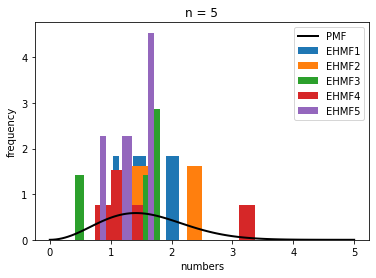

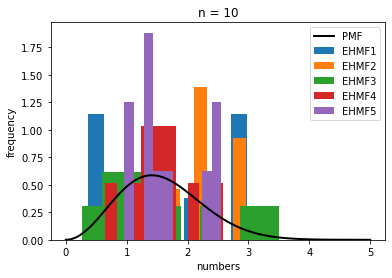

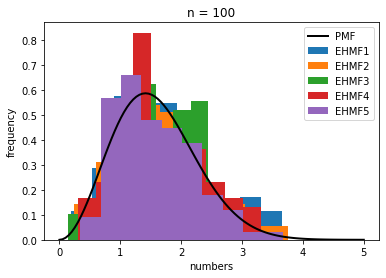

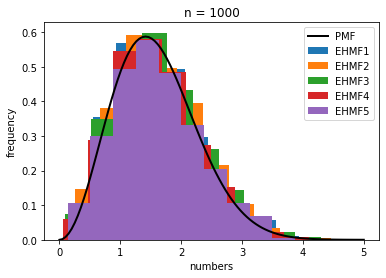

In [88]:
#n=5
for a in range(5):
    plt.hist(means__5[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 5")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=10
for a in range(5):
    plt.hist(means__10[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 10")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=100
for a in range(5):
    plt.hist(means__100[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 100")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=1000
for a in range(5):
    plt.hist(means__1000[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 1000")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()

Для непрерывной случайной величины $\xi$, обладающей непрерывной плотностью f(x), также можно построить по соответствующей выборке $X = (X_1,...,X_n)$ статистический аналог $\dot f_n(x)$ для плотности f(x), который называется гистограммой. Для этого используется методгруппировки, в соответствии с которым область $\Delta$ возможных значений $\xi$ разбивается на некоторое число N непересекающихся интервалов $\Delta_1,...,\Delta_N$ (так что $\Delta = \bigcup_{r=1}^{N} \Delta_r$, подсчитывают числа $\nu_1,...,\nu_N$ наблюдений $X_1,...,X_n$, попавших в соответствующие интервалы:
$\nu_r = \sum_{j=1}^{N} I(X_j \in \Delta_r), r = 1,...,N$ (так что $\sum_{r=1}^{N} \nu_r = n,$   
и строят кусочно-постоянную функцию 
$$\dot f_n(x) = \frac{\nu_r}{n|\Delta_r|}$$
при x $\in \Delta_r, r = 1,...,N$  
Здесь $|\Delta_r|$ - длина интервала $\Delta_r$. То, что построенная по такому правилу гистограмма $\dot f_n(x)$ действительно "похожа" на теоретическую плотность f(x), следует из закона больших чисел, согласно которому при $n \rightarrow \infty$ относительная частота $\frac{\nu_r}{n}$ сближается с теоретической вероятностью  
$$P\{\xi \in \Delta_r\} = \int_{\Delta_r} f(x)dx$$
Но этот интеграл по теореме о среднем равен $f(a_r)|\Delta_r|$ где $a_r$ - некоторая внутренняя точка интервала $\Delta_r$(при малом $\Delta_r$ в качестве $a_r$ можно взять, например, середину интервала), Таким образом, при больших n и достаточно "мелком" разбиении $\{\Delta_r\} \dot f_n(x) \approx f(a_r)$ при $x \in \Delta_r$ т.е. гистограмма $\dot f_n(x)$ будет достаточно хорошо приближать график плотности f(x), следовательно, $\dot f_n(x)$  можно рассматривать вкачестве статистического аналога (оценки) для f(x).Наряду с гистограммой, в качестве приближения для неизвестной теоретической плотности f(x) можно использовать кусочно-линейный графикназываемый полигоном частот. Он также считается статистическим аналогом теоретической плотности. Данные на полигоне частот игистограммах подтверждают теоретические знания: с увеличением объема выборки полигон частот и гистограммы практически совпадают стеоретической плотностью f(x).

## 3 Литература

[1] "Справочник по вероятностным распределениям" Р.Н.Вадзинский  
https://fileskachat.com/view/10838_b741e0be3370efed892ccfe2b6c1358f.html   
[2] "Введение в математическую статистику" (Ивченко Г.И., Медведев Ю.И.)  
http://bookre.org/reader?file=1221378&pg=101  
[3] Power Maxwell distribution:   
https://arxiv.org/pdf/1807.01200.pdf  
[4] Geometric Distributionhttps:  
https://brilliant.org/wiki/geometric-distribution/  
[5]The Maxwell Distributionhttps:  
https://randomservices.org/random/special/Maxwell.html  
[6]The Geometric Distributionhttps:  
https://randomservices.org/random/bernoulli/Geometric.html  
[7] Sampling from a Normal Distribution  
http://bjlkeng.github.io/posts/sampling-from-a-normal-distribution/  
[8] "Моделирование распределений В.В.Некруткин"     
https://clck.ru/RHRdy